<a href="https://colab.research.google.com/github/ZakyFarhan/CNN/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
import time
start = time.time()

train_data_path = '/content/drive/My Drive/Skripsi/dataset/train'
validation_data_path = '/content/drive/My Drive/Skripsi/dataset/validation'

In [0]:
img_width, img_height = 150, 150
batch_size = 10
samples_per_epoch = 700
validation_steps = 170
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 2
lr = 0.0001

In [0]:
#Step 2 Convolution
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

#Step 3 Flattening
model.add(Flatten())

#Step 4 Full Connection
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

hist = model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_steps)

#Calculate execution time
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")

Found 710 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=25, validation_data=<keras_pre..., validation_steps=170, steps_per_epoch=70)`




Epoch 1/25
70/70 [==============================] - 319s 5s/step - loss: 0.6598 - acc: 0.7600 - val_loss: 0.0930 - val_acc: 0.9763
Epoch 2/25
70/70 [==============================] - 33s 473ms/step - loss: 0.2130 - acc: 0.9243 - val_loss: 0.0532 - val_acc: 0.9763
Epoch 3/25
70/70 [==============================] - 33s 468ms/step - loss: 0.2006 - acc: 0.9214 - val_loss: 0.0704 - val_acc: 0.9704
Epoch 4/25
70/70 [==============================] - 33s 475ms/step - loss: 0.1735 - acc: 0.9400 - val_loss: 0.0904 - val_acc: 0.9763
Epoch 5/25
70/70 [==============================] - 33s 468ms/step - loss: 0.1294 - acc: 0.9414 - val_loss: 0.1409 - val_acc: 0.9527
Epoch 6/25
70/70 [==============================] - 33s 468ms/step - loss: 0.1662 - acc: 0.9357 - val_loss: 0.0467 - val_acc: 0.9882
Epoch 7/25
70/70 [==============================] - 33s 468ms/step - loss: 0.1019 - acc: 0.9586 - val_loss: 0.1109 - val_acc: 0.9645
Epoch 8/25
70/70 [==============================] - 33s 468ms/step - 

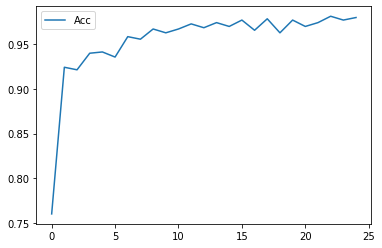

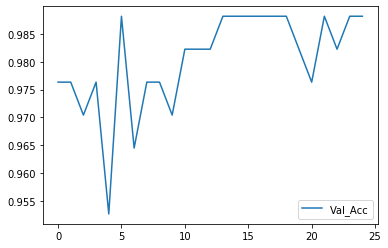

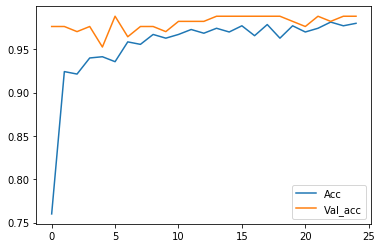

In [0]:
#Show accuracy graph
plt.plot(hist.history['acc'])
plt.legend(['Acc'])
plt.show()

plt.plot(hist.history['val_acc'])
plt.legend(['Val_Acc'])
plt.show()

#Show accuracy graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Acc', 'Val_acc'])
plt.show()

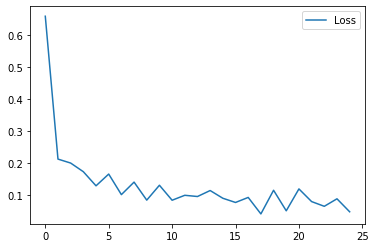

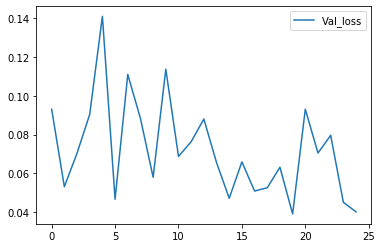

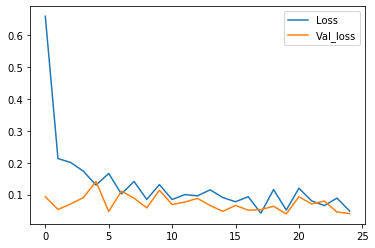

In [0]:
#Show error value graph
plt.plot(hist.history['loss'])
plt.legend(['Loss'])
plt.show()

#Show error value graph
plt.plot(hist.history['val_loss'])
plt.legend(['Val_loss'])
plt.show()

#Show error value graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])
plt.show()

In [0]:
target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

# Testing

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, load_model
import time

In [0]:
start = time.time()

In [0]:
#Define Path
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
test_path = '/content/drive/My Drive/Skripsi/dataset/test_image'

In [0]:
#Load the pre-trained models
model = load_model(model_path)
model.load_weights(model_weights_path)

In [0]:
#Define image parameters
img_width, img_height = 150, 150

In [0]:
#Prediction Function
def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 0:
    print("Predicted: Kebakaran")
  elif answer == 1:
    print("Predicted: Non-Kebakaran")
  return answer

In [0]:
#Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    result = predict(ret[0] + '/' + filename)
    print(" ")

/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0001.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0004.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0003.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0002.jpg
Predicted: Non-Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0009.jpeg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0007.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0005.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0006.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0011.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0010.jpg
Predicted: Kebakaran
 
/content/drive/My Drive/Skripsi/dataset/test_image/kebakaran_0008

In [0]:
#Calculate execution time
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")

Execution Time: 5.448955897490183 minutes
